### Numerical solution

FPlanck is a Python library for numerically solving the Fokker-Planck partial differential equation in N dimensions using a matrix numerical method. We will use it to find the numerical solution of the PDE and measure the training and test errors of our PINN.

$$\frac{\partial p(x,t)}{\partial t} = \frac{\partial}{\partial x}\left[\frac{m\omega^2}{\gamma} x \,p(x,t) + D \frac{\partial p(x,t)}{\partial x}\right] \qquad A= \frac{m\omega^2}{\gamma}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import constants
from matplotlib.animation import FuncAnimation
from fplanck import fokker_planck, boundary, harmonic_potential, gaussian_pdf, uniform_pdf

$$A= \frac{m\omega^2}{\gamma} = \frac{m\omega^2 D}{k_B T} $$

In [ ]:
'''# Define the constants
nm = 1e-9
viscosity = 8e-4
radius = 50*nm
drag = 6*np.pi*viscosity*radius
T = 300'''

In [2]:
# Define the constants
# For simplicity m\omega^2 = 1
nm = 0.1
A = 10
D = 0.1
vis = 1/A
T = D/(constants.k*A)
drag = T*constants.k/D

In [3]:
# Define the harmonic potential
U = harmonic_potential((0,0), 1e-6)

# Model the function
sim = fokker_planck(temperature=T, drag=drag,
                    extent=60*nm, #extent (size) of the grid (vector)
                    resolution=1*nm, #spatial resolution of the grid (scalar or vector)
                    boundary=boundary.reflecting, #type of boundary condition (scalar or vector)
                    potential=U)

In [4]:
### steady-state solution
steady = sim.steady_state()

In [5]:
### time-evolved solution
pdf = gaussian_pdf(0.5, 0.05)
#pdf = uniform_pdf(lambda x: (x > 100*nm) & (x < 150*nm))
p0 = pdf(sim.grid[0])
Nsteps = 200
time, Pt = sim.propagate_interval(pdf, 1, Nsteps=Nsteps)

"def update(i):\n    line.set_ydata(Pt[i])\n    return [line]\n\nanim = FuncAnimation(fig, update, frames=range(Nsteps), interval=30)\nax.set(xlabel='x (nm)', ylabel='normalized PDF')\nax.margins(x=0)\n\nplt.show()"

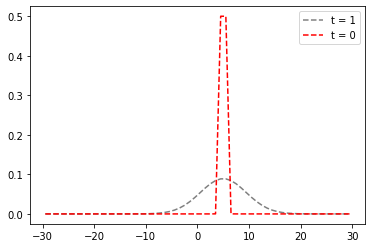

In [6]:
### animation
fig, ax = plt.subplots()

ax.plot(sim.grid[0]/nm, Pt[-1,:], color='k', ls='--', alpha=.5, label = 't = 1')
ax.plot(sim.grid[0]/nm, p0, color='red', ls='--', alpha=1, label = 't = 0')
ax.legend()
#line, = ax.plot(sim.grid[0]/nm, p0, lw=2, color='C3')

'''def update(i):
    line.set_ydata(Pt[i])
    return [line]

anim = FuncAnimation(fig, update, frames=range(Nsteps), interval=30)
ax.set(xlabel='x (nm)', ylabel='normalized PDF')
ax.margins(x=0)

plt.show()'''